In [258]:
#Importación de funcionalidad
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [259]:
def Lattice_gencu(N): #Inicia la grilla en estado "frío" con spines arriba
    return np.ones(N*N).reshape(N,N)

In [260]:
def Lattice_gencd(N): #Inicia la grilla en estado "frío" con spines abajo
     return -np.ones(N*N).reshape(N,N)

In [261]:
def Lattice_genh(N): #Inicia la grilla con una distribución de spines random.
    return np.random.choice([-1,1], N*N).reshape(N,N)

In [262]:
def Energy_of_configuration(spin): 
    kernel = sp.ndimage.generate_binary_structure(2,1)
    kernel[1][1] = False
    E_0 = spin*sp.ndimage.convolve(spin, kernel, mode= 'constant')
    
    return E_0.sum()

In [263]:
def Magnetization_of_configuration(spin):
    return np.sum(spin,dtype = np.int32)

In [264]:
 def Configuration_update_H(β, J, spin, H = 0.0, iterations= 100000):
        N = spin.shape[0]
        random_condition_energy = np.random.default_rng().random(iterations)
        for i in range(0,iterations):
            spin1 = np.copy(spin)
            row, col = np.random.randint(N), np.random.randint(N)
            spin1[row][col] = -1 if (spin[row][col] > 0) else 1
            dE = spin1[row,col]*(spin1[(row + 1)%N, col] + spin1[(row - 1)%N, col] + spin1[(row + 1)%N, col] + spin1[row , (col + 1)%N] + spin1[row , (col - 1)%N])
            δH = -H*(spin1.sum()-spin.sum()) -J*dE
            
            if(random_condition_energy[i] < np.exp(-β*δH)):
                spin = spin1

        return spin

In [265]:
spin = Lattice_gencu(100)

spin1 = Configuration_update_H2(0.0,1,spin)

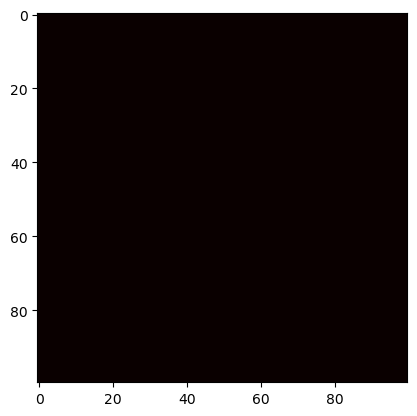

In [266]:
im = plt.imshow(spin, cmap='hot', interpolation='none')

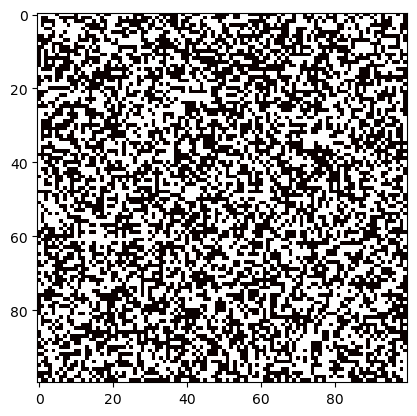

In [267]:
im = plt.imshow(spin1, cmap='hot', interpolation='none')

In [10]:
def Ising_model(N):
    pass
    
    T = np.linspace(1.2,3.8,N**2)
    energy= magnetization = heat_capacity = np.zeros(N**2)
    n1 = 1/N**3
    n2 = 1/N**4
    
    for t in range(N**2):
        spin = Lattice_gencu(N)
        
        energy1 = magn1= energy2 = magn2 = 0
        
        β = 1/T
        β2 = β**2
        
        for _ in range(N**2):
            Configuration_update_H(β, 1,0, spin, Energy_of_configuration)
    